In [22]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [24]:
tf.keras.backend.clear_session()

In [25]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [26]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [27]:
subject = 'Roraima - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [28]:
data = pd.read_csv('2003_raw_Roraima_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Roraima - PIB - Per Capita,Roraima - PIB - Preços de Mercado,Roraima - PIB - Estadual,Roraima - PIB - Construção Civil,Roraima - População,Roraima - INCC (%),Roraima - IPCA - Variação mensal durante o Plano Real (%),Roraima - IGP-DI,Roraima - Taxa Selic (%),Roraima - IDH - Longevidade,Roraima - IDH - Renda,Roraima - IDH - Educação,Roraima - NFSP - Fluxo Mensal (Milhões de reais),Roraima - Estoque liquido de capital fixo - (R$),Roraima - Desemprego,Roraima - Produção de Cimento (t),Roraima - Valor,Roraima - Consumo de Cimento (t)
0,2003-01-01,351084.611644,1.848061e+05,1.012147,411797.185612,346871.0,1.70,12.53,2.70,0.082293,0.717,0.652,0.457,3.46,6.098524e+06,5.89899,NaN,NaN,6920.0
1,2003-02-01,351084.611644,1.848061e+05,1.012147,411797.185612,346871.0,1.51,2.25,2.17,0.088771,0.717,0.652,0.457,3.59,6.172460e+06,5.89899,28472.0,NaN,7476.0
2,2003-03-01,351084.611644,1.848061e+05,1.012147,411797.185612,346871.0,1.39,3.86,1.59,0.090733,0.717,0.652,0.457,3.84,6.172460e+06,5.89899,46575.0,NaN,8659.0
3,2003-04-01,351084.611644,1.848061e+05,1.012147,411797.185612,346871.0,1.38,5.13,1.66,0.092749,0.717,0.652,0.457,3.95,6.172460e+06,5.89899,110056.0,NaN,7259.0
4,2003-05-01,351084.611644,1.848061e+05,1.012147,411797.185612,346871.0,0.90,6.15,0.41,0.092758,0.717,0.652,0.457,4.06,6.172460e+06,5.89899,54649.0,NaN,6786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,605838.737837,1.022257e+06,1.050767,398713.664530,576568.0,0.58,2.42,-0.01,0.024620,0.780,0.710,0.770,0.69,7.827728e+06,12.30000,53129.0,NaN,9654.0
200,2019-09-01,605838.737837,1.022257e+06,1.050767,398713.664530,576568.0,0.42,2.54,-0.51,0.022751,0.780,0.710,0.770,0.62,7.827728e+06,12.00000,NaN,NaN,9422.0
201,2019-10-01,605838.737837,1.022257e+06,1.050767,398713.664530,576568.0,0.46,2.49,0.50,0.022035,0.780,0.710,0.770,0.59,7.827728e+06,11.90000,71115.0,NaN,11160.0
202,2019-11-01,605838.737837,1.022257e+06,1.050767,398713.664530,576568.0,0.18,2.60,0.55,0.020790,0.780,0.710,0.770,0.57,7.827728e+06,11.70000,NaN,NaN,10491.0


In [29]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      2.928
1      2.118
2      2.876
3      3.091
4      2.684
       ...  
199      NaN
200      NaN
201      NaN
202      NaN
203      NaN
Name: Roraima - Consumo de Cimento (t), Length: 204, dtype: float64

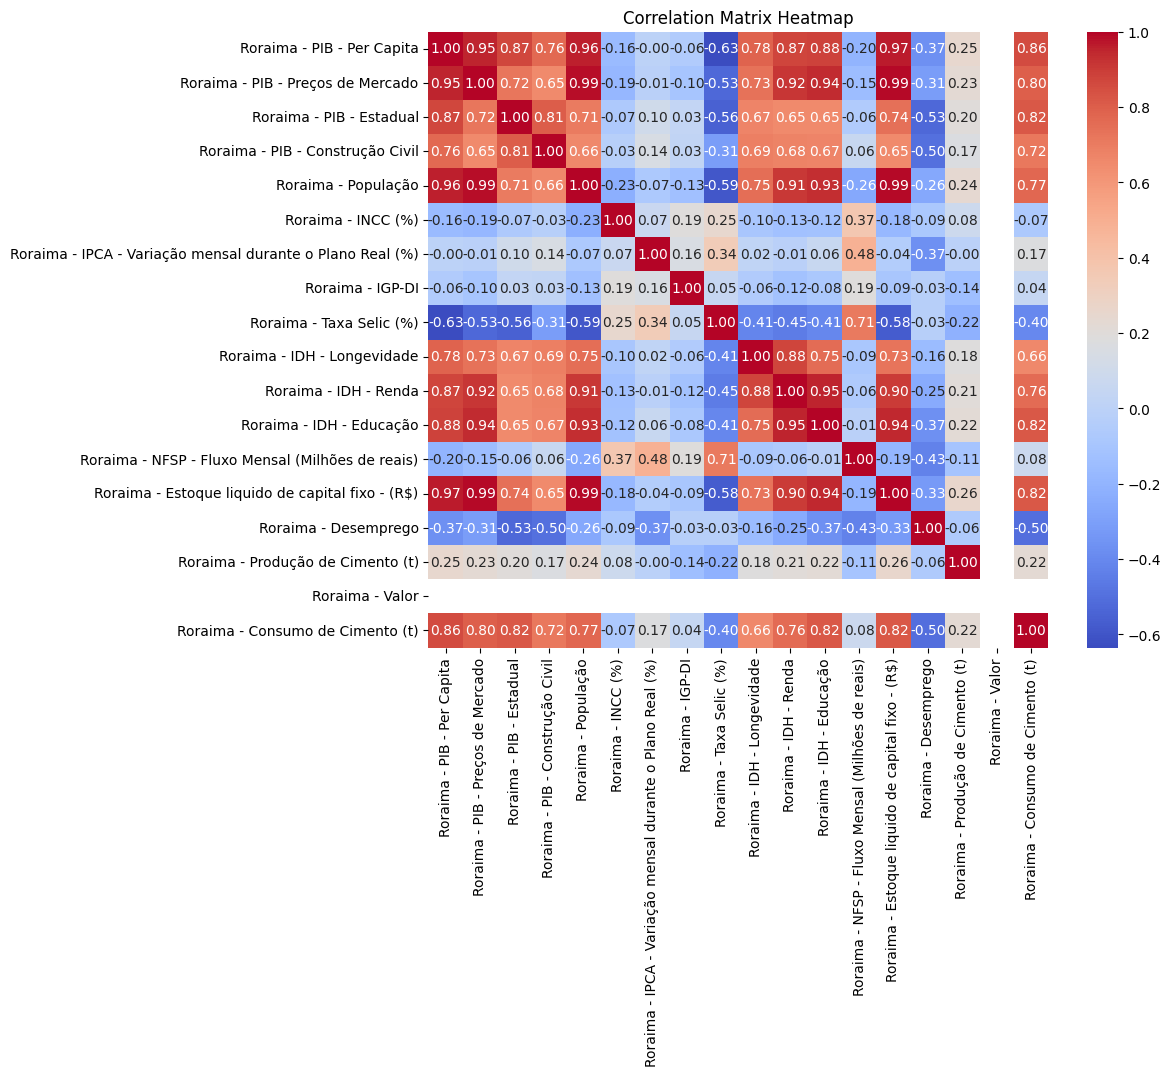

In [30]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [31]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Roraima - PIB - Per Capita,Roraima - PIB - Preços de Mercado,Roraima - PIB - Estadual,Roraima - PIB - Construção Civil,Roraima - População,Roraima - INCC (%),Roraima - IPCA - Variação mensal durante o Plano Real (%),Roraima - IGP-DI,Roraima - Taxa Selic (%),Roraima - IDH - Longevidade,Roraima - IDH - Renda,Roraima - IDH - Educação,Roraima - NFSP - Fluxo Mensal (Milhões de reais),Roraima - Estoque liquido de capital fixo - (R$),Roraima - Desemprego,Roraima - Produção de Cimento (t),Roraima - Valor
0,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.998868,4.052332,3.466715,2.303195,-0.844996,-0.905926,-0.892228,3.108599,-1.539424,-1.475928,0.000000,0.0
1,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.647487,-0.596188,2.630940,2.745235,-0.844996,-0.905926,-0.892228,3.275709,-1.411460,-1.475928,-0.915469,0.0
2,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.425561,0.131839,1.716318,2.879123,-0.844996,-0.905926,-0.892228,3.597074,-1.411460,-1.475928,-0.750410,0.0
3,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.407068,0.706121,1.826703,3.016721,-0.844996,-0.905926,-0.892228,3.738475,-1.411460,-1.475928,-0.171605,0.0
4,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,0.519367,1.167355,-0.144465,3.017322,-0.844996,-0.905926,-0.892228,3.879875,-1.411460,-1.475928,-0.676793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.057152,1.731412,0.188653,0.258881,1.539873,-0.590259,-0.966985,-1.264088,-0.729479,1.016359,1.928567,1.423168,-0.374997,1.441346,0.721316,-0.222272,0.0
176,1.057152,1.731412,0.188653,0.258881,1.539873,-0.479297,-0.881068,-0.412544,-0.941281,1.016359,1.928567,1.423168,-0.439270,1.441346,0.721316,-0.979202,0.0
177,1.057152,1.731412,0.188653,0.258881,1.539873,-1.034110,-0.808718,0.186692,-1.140710,1.016359,1.928567,1.423168,-0.503543,1.441346,0.721316,-0.497602,0.0
178,1.057152,1.731412,0.188653,0.258881,1.539873,-0.571766,-0.614276,-0.633314,-1.226481,1.016359,1.928567,1.423168,-0.503543,1.441346,0.757931,0.000000,0.0


In [32]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Roraima - PIB - Per Capita,Roraima - PIB - Preços de Mercado,Roraima - PIB - Estadual,Roraima - PIB - Construção Civil,Roraima - População,Roraima - INCC (%),Roraima - IPCA - Variação mensal durante o Plano Real (%),Roraima - IGP-DI,Roraima - Taxa Selic (%),Roraima - IDH - Longevidade,Roraima - IDH - Renda,Roraima - IDH - Educação,Roraima - NFSP - Fluxo Mensal (Milhões de reais),Roraima - Estoque liquido de capital fixo - (R$),Roraima - Desemprego,Roraima - Produção de Cimento (t),Roraima - Valor
0,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.998868,4.052332,3.466715,2.303195,-0.844996,-0.905926,-0.892228,3.108599,-1.539424,-1.475928,0.000000,0.0
1,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.647487,-0.596188,2.630940,2.745235,-0.844996,-0.905926,-0.892228,3.275709,-1.411460,-1.475928,-0.915469,0.0
2,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.425561,0.131839,1.716318,2.879123,-0.844996,-0.905926,-0.892228,3.597074,-1.411460,-1.475928,-0.750410,0.0
3,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,1.407068,0.706121,1.826703,3.016721,-0.844996,-0.905926,-0.892228,3.738475,-1.411460,-1.475928,-0.171605,0.0
4,-1.249733,-1.279121,-0.232237,0.216687,-1.634866,0.519367,1.167355,-0.144465,3.017322,-0.844996,-0.905926,-0.892228,3.879875,-1.411460,-1.475928,-0.676793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.076020,1.452983,0.444308,0.207598,1.377416,-0.238878,0.629248,-1.406012,0.272188,0.720906,0.886474,1.351484,0.794771,1.416222,-0.377121,0.000000,0.0
164,1.076020,1.452983,0.444308,0.207598,1.377416,-0.608753,0.837256,-0.112926,0.272188,0.720906,0.886474,1.351484,0.730498,1.416222,-0.340506,0.000000,0.0
165,1.076020,1.452983,0.444308,0.207598,1.377416,-0.534778,0.877953,-0.743700,0.272188,0.720906,0.886474,1.351484,0.743353,1.416222,-0.303892,0.000000,0.0
166,1.076020,1.452983,0.444308,0.207598,1.377416,-0.756703,1.000045,-0.586006,0.248413,0.720906,0.886474,1.351484,0.614807,1.416222,-0.303892,0.000000,0.0


In [33]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      2.928
1      2.118
2      2.876
3      3.091
4      2.684
       ...  
163    7.275
164    9.468
165    7.970
166    7.866
167    8.108
Name: Roraima - Consumo de Cimento (t), Length: 168, dtype: float64

In [34]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [35]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [36]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Roraima - PIB - Per Capita,Roraima - PIB - Preços de Mercado,Roraima - PIB - Estadual,Roraima - PIB - Construção Civil,Roraima - População,Roraima - INCC (%),Roraima - IPCA - Variação mensal durante o Plano Real (%),Roraima - IGP-DI,Roraima - Taxa Selic (%),Roraima - IDH - Longevidade,Roraima - IDH - Renda,Roraima - IDH - Educação,Roraima - NFSP - Fluxo Mensal (Milhões de reais),Roraima - Estoque liquido de capital fixo - (R$),Roraima - Desemprego,Roraima - Produção de Cimento (t),Roraima - Valor
132,1.240209,1.036185,1.254321,1.826852,1.043681,-0.960135,1.058830,0.297077,-0.755853,0.425452,0.886474,1.208116,-0.285015,0.834026,-0.962954,-0.713064,0.0
133,1.240209,1.036185,1.254321,1.826852,1.043681,0.482379,-1.364912,-0.160234,-0.688658,0.425452,0.886474,1.208116,-0.349288,1.129318,-0.779881,0.000000,0.0
134,1.240209,1.036185,1.254321,1.826852,1.043681,-0.534778,-1.052901,0.549386,-0.626634,0.425452,0.886474,1.208116,-0.374997,1.129318,-0.670037,-0.115932,0.0
135,1.240209,1.036185,1.254321,1.826852,1.043681,-0.627247,-0.627842,1.542855,-0.571481,0.425452,0.886474,1.208116,-0.259306,1.129318,-0.743267,0.000000,0.0
136,1.240209,1.036185,1.254321,1.826852,1.043681,0.482379,-0.320352,-0.081387,-0.516512,0.425452,0.886474,1.208116,-0.053632,1.129318,-0.816496,0.000000,0.0
137,1.240209,1.036185,1.254321,1.826852,1.043681,2.646150,-0.107822,-1.500628,-0.510405,0.425452,0.886474,1.208116,0.023495,1.129318,-0.889725,0.000000,0.0
138,1.240209,1.036185,1.254321,1.826852,1.043681,0.075516,0.082098,-1.784477,-0.510405,0.425452,0.886474,1.208116,-0.002214,1.129318,-0.926339,2.865261,0.0
139,1.240209,1.036185,1.254321,1.826852,1.043681,0.241960,0.086620,-1.658322,-0.510405,0.425452,0.886474,1.208116,-0.143614,1.129318,-0.999569,0.000000,0.0
140,1.240209,1.036185,1.254321,1.826852,1.043681,-0.997122,0.204189,-0.696392,-0.510054,0.425452,0.886474,1.208116,-0.182178,1.129318,-1.072798,0.000000,0.0
141,1.240209,1.036185,1.254321,1.826852,1.043681,-0.867666,0.470982,-0.759469,-0.510405,0.425452,0.886474,1.208116,-0.105051,1.129318,-1.146027,0.000000,0.0


In [37]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(144, activation='tanh',
                             return_sequences=True,
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [41]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [42]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[1471319084, 3546319561, 490121088, 651127378, 339098608, 299627377, 2526943947, 4273643364, 432179491, 2142106561]


Step: 0 ___________________________________________
val_loss: 2.319504737854004
winner_seed: 1471319084


Step: 1 ___________________________________________
val_loss: 2.5937557220458984


Step: 2 ___________________________________________
val_loss: 2.3904643058776855


Step: 3 ___________________________________________
val_loss: 2.4951322078704834


Step: 4 ___________________________________________
val_loss: 2.3458518981933594


Step: 5 ___________________________________________
val_loss: 2.6444075107574463


Step: 6 ___________________________________________
val_loss: 2.4761147499084473


Step: 7 ___________________________________________
val_loss: 2.490009069442749


Step: 8 ___________________________________________
val_loss: 2.61657452583313


Step: 9 ___________________________________________
val_loss: 2.6412413120269775
1/1 [=============================

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.545228,7.523377,7.713232,7.982609,8.044947,8.045868,8.331141,8.582208,8.721942,8.97461,9.068139,9.046778
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.362772,3.199622,2.911768,2.610392,2.636053,0.158868,1.41986,1.071793,0.700058,2.18539,1.422861,1.178223


[1906568120, 478007152, 3118647408, 1693240863, 2480487248, 2426276634, 4160578933, 1236424481, 1259453984, 2189102108]


Step: 0 ___________________________________________
val_loss: 2.561408519744873
winner_seed: 1906568120


Step: 1 ___________________________________________
val_loss: 2.4257466793060303
winner_seed: 478007152


Step: 2 ___________________________________________
val_loss: 2.7989659309387207


Step: 3 ___________________________________________
val_loss: 2.3750734329223633
winner_seed: 1693240863


Step: 4 ___________________________________________
val_loss: 2.801323652267456


Step: 5 ___________________________________________
val_loss: 2.656308174133301


Step: 6 ___________________________________________
val_loss: 2.402484178543091


Step: 7 ___________________________________________
val_loss: 2.4544482231140137


Step: 8 ___________________________________________
val_loss: 2.4900972843170166


Step: 9 ___________________________________________
val_loss: 2.

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.059351,7.395883,7.639418,7.570247,7.29612,6.88421,7.730696,8.619635,8.339052,8.719693,8.660645,8.393128
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.848649,3.327116,2.985582,3.022754,3.38488,1.00279,2.020304,1.034366,1.082948,2.440307,1.830355,1.831872


[231276325, 3045019636, 2352534415, 2965644523, 3036828997, 83606729, 3698624563, 1273969970, 307900730, 3310101884]


Step: 0 ___________________________________________
val_loss: 2.9375557899475098
winner_seed: 231276325


Step: 1 ___________________________________________
val_loss: 2.5033013820648193
winner_seed: 3045019636


Step: 2 ___________________________________________
val_loss: 3.2818870544433594


Step: 3 ___________________________________________
val_loss: 2.7620012760162354


Step: 4 ___________________________________________
val_loss: 2.9084863662719727


Step: 5 ___________________________________________
val_loss: 2.474949598312378
winner_seed: 83606729


Step: 6 ___________________________________________
val_loss: 2.3895962238311768
winner_seed: 3698624563


Step: 7 ___________________________________________
val_loss: 2.638692617416382


Step: 8 ___________________________________________
val_loss: 2.489403486251831


Step: 9 ____________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.076526,7.148149,7.450067,7.71521,7.716648,7.575905,7.981593,9.52833,9.295106,9.409032,9.335178,9.201306
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.831474,3.57485,3.174933,2.87779,2.964352,0.311095,1.769407,0.12567,0.126894,1.750968,1.155822,1.023694


[2669625056, 3120831767, 2561377814, 2181239346, 192156122, 2356951953, 4004113780, 2511523134, 421914152, 556357272]


Step: 0 ___________________________________________
val_loss: 2.6987252235412598
winner_seed: 2669625056


Step: 1 ___________________________________________
val_loss: 2.5370287895202637
winner_seed: 3120831767


Step: 2 ___________________________________________
val_loss: 2.9363083839416504


Step: 3 ___________________________________________
val_loss: 3.497681140899658


Step: 4 ___________________________________________
val_loss: 2.8146097660064697


Step: 5 ___________________________________________
val_loss: 2.560953140258789


Step: 6 ___________________________________________
val_loss: 2.4490673542022705
winner_seed: 4004113780


Step: 7 ___________________________________________
val_loss: 2.298335313796997
winner_seed: 2511523134


Step: 8 ___________________________________________
val_loss: 2.3944778442382812


Step: 9 ________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,6.947147,7.011024,7.05153,7.226824,7.193985,7.165508,7.94744,8.997405,8.96543,9.218384,9.072666,8.873975
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.960853,3.711975,3.57347,3.366177,3.487015,0.721492,1.80356,0.656595,0.45657,1.941616,1.418334,1.351026


[2580185867, 2319794751, 3345552711, 4215144543, 2273800790, 1191283578, 4064951530, 2778975030, 2372990736, 4239281638]


Step: 0 ___________________________________________
val_loss: 2.08064603805542
winner_seed: 2580185867


Step: 1 ___________________________________________
val_loss: 2.606398105621338


Step: 2 ___________________________________________
val_loss: 2.341937780380249


Step: 3 ___________________________________________
val_loss: 2.5274977684020996


Step: 4 ___________________________________________
val_loss: 2.420912265777588


Step: 5 ___________________________________________
val_loss: 2.7395102977752686


Step: 6 ___________________________________________
val_loss: 3.4270360469818115


Step: 7 ___________________________________________
val_loss: 2.316255807876587


Step: 8 ___________________________________________
val_loss: 2.633391857147217


Step: 9 ___________________________________________
val_loss: 2.8033180236816406
1/1 [===========================

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.806976,8.253462,8.137902,7.986526,7.682987,6.965676,7.730831,8.419686,8.384315,10.199442,10.198797,8.884633
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.101024,2.469538,2.487098,2.606474,2.998013,0.921324,2.020169,1.234314,1.037685,0.960558,0.292203,1.340367


[1076114922, 3528128537, 3064494814, 1434667421, 2010127391, 4246758702, 2767183062, 2706397153, 473770648, 4202154005]


Step: 0 ___________________________________________
val_loss: 2.2366127967834473
winner_seed: 1076114922


Step: 1 ___________________________________________
val_loss: 2.189361572265625
winner_seed: 3528128537


Step: 2 ___________________________________________
val_loss: 2.8126778602600098


Step: 3 ___________________________________________
val_loss: 2.7955572605133057


Step: 4 ___________________________________________
val_loss: 3.0702362060546875


Step: 5 ___________________________________________
val_loss: 2.9405856132507324


Step: 6 ___________________________________________
val_loss: 3.240114212036133


Step: 7 ___________________________________________
val_loss: 2.7408576011657715


Step: 8 ___________________________________________
val_loss: 2.9420580863952637


Step: 9 ___________________________________________
val_loss: 2.867636203765869
1/1 [

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,6.734892,6.462626,6.400865,6.815413,6.538556,6.50567,7.311087,7.650269,8.139937,8.496015,7.853907,7.347023
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,3.173108,4.260373,4.224135,3.777587,4.142444,1.38133,2.439913,2.003731,1.282063,2.663985,2.637093,2.877977


[148425316, 3001690249, 3658152358, 2573807407, 1287604086, 1753763731, 2869825620, 1669576808, 4064920255, 2958895218]


Step: 0 ___________________________________________
val_loss: 2.432037830352783
winner_seed: 148425316


Step: 1 ___________________________________________
val_loss: 2.3091604709625244
winner_seed: 3001690249


Step: 2 ___________________________________________
val_loss: 2.316837787628174


Step: 3 ___________________________________________
val_loss: 2.6172428131103516


Step: 4 ___________________________________________
val_loss: 2.8053786754608154


Step: 5 ___________________________________________
val_loss: 2.5326004028320312


Step: 6 ___________________________________________
val_loss: 2.563786506652832


Step: 7 ___________________________________________
val_loss: 2.4945590496063232


Step: 8 ___________________________________________
val_loss: 2.7239863872528076


Step: 9 ___________________________________________
val_loss: 2.690338373184204
1/1 [==

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.444625,7.607637,7.684105,7.759483,7.492199,7.390639,8.199701,8.849329,8.900152,9.274013,9.181405,8.767612
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.463375,3.115363,2.940895,2.833518,3.1888,0.496361,1.551299,0.804671,0.521848,1.885987,1.309595,1.457389


[2198507299, 1627661646, 2199894385, 500952819, 3630514949, 1194613192, 848974973, 825719859, 1523933972, 2857624853]


Step: 0 ___________________________________________
val_loss: 2.282989740371704
winner_seed: 2198507299


Step: 1 ___________________________________________
val_loss: 2.250058174133301
winner_seed: 1627661646


Step: 2 ___________________________________________
val_loss: 2.417314291000366


Step: 3 ___________________________________________
val_loss: 2.9268016815185547


Step: 4 ___________________________________________
val_loss: 2.9640860557556152


Step: 5 ___________________________________________
val_loss: 2.309988021850586


Step: 6 ___________________________________________
val_loss: 2.1815073490142822
winner_seed: 848974973


Step: 7 ___________________________________________
val_loss: 2.158236503601074
winner_seed: 825719859


Step: 8 ___________________________________________
val_loss: 2.585008144378662


Step: 9 _____________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.290537,7.28692,7.329774,7.667006,7.581127,7.657126,8.551353,9.123879,9.509976,10.031635,9.741486,9.302285
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.617463,3.43608,3.295226,2.925995,3.099873,0.229874,1.199647,0.530121,0.087976,1.128365,0.749515,0.922715


[1560195942, 2851539702, 4243222962, 3874263421, 1369982887, 1281426275, 24177784, 2276289957, 4255547804, 2039413412]


Step: 0 ___________________________________________
val_loss: 2.6635806560516357
winner_seed: 1560195942


Step: 1 ___________________________________________
val_loss: 3.1898741722106934


Step: 2 ___________________________________________
val_loss: 2.4092648029327393
winner_seed: 4243222962


Step: 3 ___________________________________________
val_loss: 3.231837272644043


Step: 4 ___________________________________________
val_loss: 2.3594117164611816
winner_seed: 1369982887


Step: 5 ___________________________________________
val_loss: 2.3464467525482178
winner_seed: 1281426275


Step: 6 ___________________________________________
val_loss: 2.346511125564575


Step: 7 ___________________________________________
val_loss: 2.479642629623413


Step: 8 ___________________________________________
val_loss: 2.58461594581604


Step: 9 _________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.17013,7.169389,7.372874,7.662439,7.523259,7.60711,8.115157,8.277285,8.854557,9.223326,8.887846,8.502414
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.73787,3.55361,3.252126,2.930562,3.157741,0.27989,1.635843,1.376716,0.567443,1.936674,1.603154,1.722587


[4155209929, 4042709027, 449107886, 108344756, 1879369856, 2748705339, 1880145008, 1564265684, 3706553597, 1578993205]


Step: 0 ___________________________________________
val_loss: 2.436450719833374
winner_seed: 4155209929


Step: 1 ___________________________________________
val_loss: 2.4232988357543945
winner_seed: 4042709027


Step: 2 ___________________________________________
val_loss: 2.669466972351074


Step: 3 ___________________________________________
val_loss: 2.489018201828003


Step: 4 ___________________________________________
val_loss: 2.2414298057556152
winner_seed: 1879369856


Step: 5 ___________________________________________
val_loss: 2.768643379211426


Step: 6 ___________________________________________
val_loss: 2.6365771293640137


Step: 7 ___________________________________________
val_loss: 2.383946418762207


Step: 8 ___________________________________________
val_loss: 2.847597122192383


Step: 9 ___________________________________________
val_loss: 2.46

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,7.030755,7.13464,7.217691,7.112801,6.950593,6.490584,6.937526,7.403421,7.267094,7.607141,8.139231,8.095756
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.877245,3.588359,3.407309,3.480199,3.730407,1.396416,2.813475,2.250579,2.154906,3.552859,2.351769,2.129245


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,7.210617,7.299311,7.399745,7.549856,7.402041,7.22883,7.883653,8.545144,8.637756,9.11533,9.01393,8.641491
Target,9.908,10.723,10.625,10.593,10.681,7.887,9.751,9.654,9.422,11.16,10.491,10.225
Error,2.697383,3.423689,3.225255,3.043144,3.278959,0.65817,1.867347,1.108856,0.784244,2.04467,1.47707,1.583509


In [43]:
display(mae)
display(mape)

7.993975

0.20343936964697854